In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df=pd.read_csv(r'D:\DS-Input-Files\CAR DETAILS FROM CAR DEKHO.csv')
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [102]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [103]:
df.shape

(4340, 8)

In [71]:
from sklearn.model_selection import train_test_split

In [109]:
x=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']
#x.head()
#y.head()

In [73]:
x.head()
#x.fuel.value_counts()
#x.seller_type.value_counts()
#x.transmission.value_counts()
x.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [104]:
df.replace(to_replace=['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car'],value=['0','1','2','3','4'],inplace=True)

In [105]:
df.replace(to_replace=['Petrol','Diesel','CNG','LPG','Electric'],value= ['0','1','2','3','4'], inplace=True)


In [108]:
df.replace(to_replace=['Individual','Dealer','Trustmark Dealer'],value=['0','1','2'],inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [107]:
df.replace(to_replace=['Manual','Automatic'],value=['0','1'],inplace=True)

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [111]:
print("X-train",x_train.shape)
print("X-test",x_test.shape)
print("y-train",y_train.shape)
print("y-test",y_test.shape)

X-train (2604, 6)
X-test (1736, 6)
y-train (2604,)
y-test (1736,)


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scx=StandardScaler()

In [114]:
x_train_std=scx.fit_transform(x_train)
x_train_std

array([[ 0.68661052, -0.13434527,  0.85236705, -0.55675237, -0.34362251,
        -0.62361756],
       [-0.01720806,  0.40214395,  0.85236705,  1.46808446,  2.91017025,
        -0.62361756],
       [-1.89405759,  3.78615285,  0.85236705, -0.55675237, -0.34362251,
         0.71844866],
       ...,
       [ 0.92121671, -1.15553186, -0.96248479,  1.46808446,  2.91017025,
        -0.62361756],
       [-0.48642044,  0.48468075, -0.96248479, -0.55675237, -0.34362251,
         0.71844866],
       [-0.95563283, -0.34068728,  0.85236705, -0.55675237, -0.34362251,
        -0.62361756]])

In [115]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [116]:
lr.fit(x_train,y_train)

LinearRegression()

In [117]:
predictions=lr.predict(x_test)
predictions

array([   3351.05763325,  696861.01840997,  540867.46189587, ...,
        -36726.15156749, 1590170.50127044,  502211.54803173])

In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [120]:
print("Accuracy",r2_score(y_test,predictions))
print("MAE",mean_absolute_error(y_test,predictions))
print("MSE",mean_squared_error(y_test,predictions))

Accuracy 0.4459319053359503
MAE 226451.50267680144
MSE 192401983495.51837


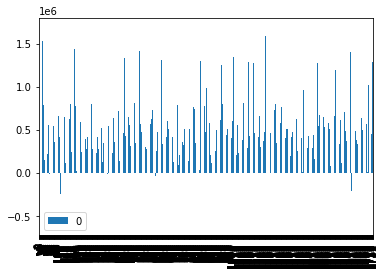

In [129]:

prediction=pd.DataFrame(predictions)
prediction.plot(kind='bar')